In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [50]:
df=pd.read_csv('C:/Users/hp/Downloads/dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [52]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# we do not have any null values in our dataset

In [53]:
df.duplicated().sum()

0

#As well as no duplicate values are there in our dataset

In [54]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [55]:
cat_cols = [i for i in df.columns if df[i].dtype == ' object']

In [56]:
cat_cols

[]

# As well as null values we do not have duplicate values too

# we have box plot for look whether the outlires are present or not

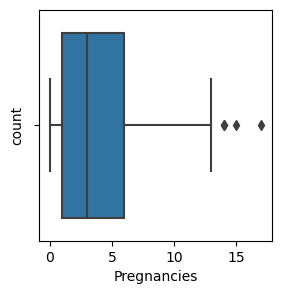

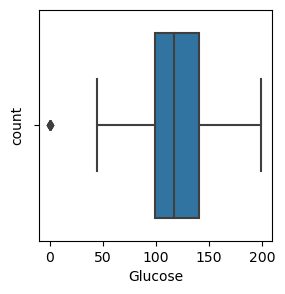

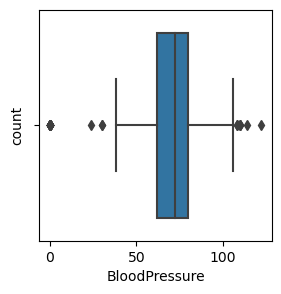

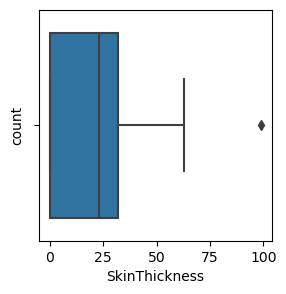

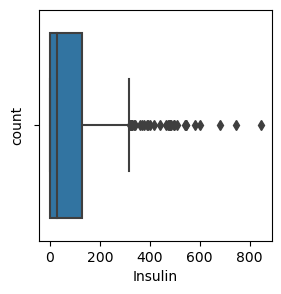

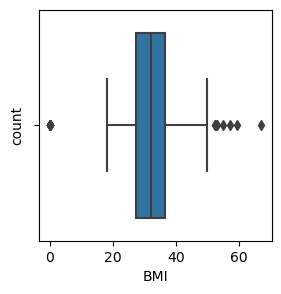

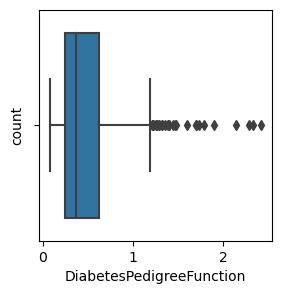

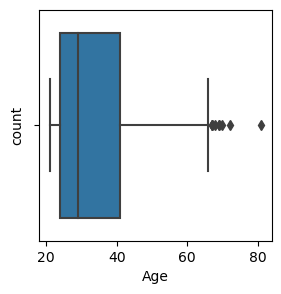

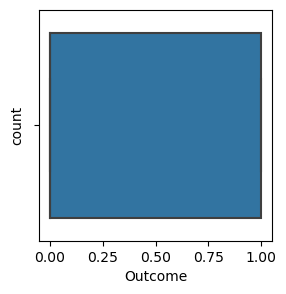

In [57]:
for col in df.columns:
    plt.figure(figsize=(3,3))
    sns.boxplot(df[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()
    

In [58]:
cols_outlier = ['Pregnancies', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [70]:
def remove_outliers(dataframe):
    for col in cols_outlier:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        
        IQR = Q3 - Q1
        
        LB = Q1 - (1.5*IQR)
        UB = Q3 + (1.5*IQR)
        df = dataframe[(dataframe[col]>=LB) & (dataframedf[col]<=UB)]
        
        return dataframe

In [ ]:
df = remove_outliers(df)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               640 non-null    int64  
 1   Glucose                   640 non-null    int64  
 2   BloodPressure             640 non-null    int64  
 3   SkinThickness             640 non-null    int64  
 4   Insulin                   640 non-null    int64  
 5   BMI                       640 non-null    float64
 6   DiabetesPedigreeFunction  640 non-null    float64
 7   Age                       640 non-null    int64  
 8   Outcome                   640 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 50.0 KB


# Now we have removed all the outliers present in our dataset

#check the histogram

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

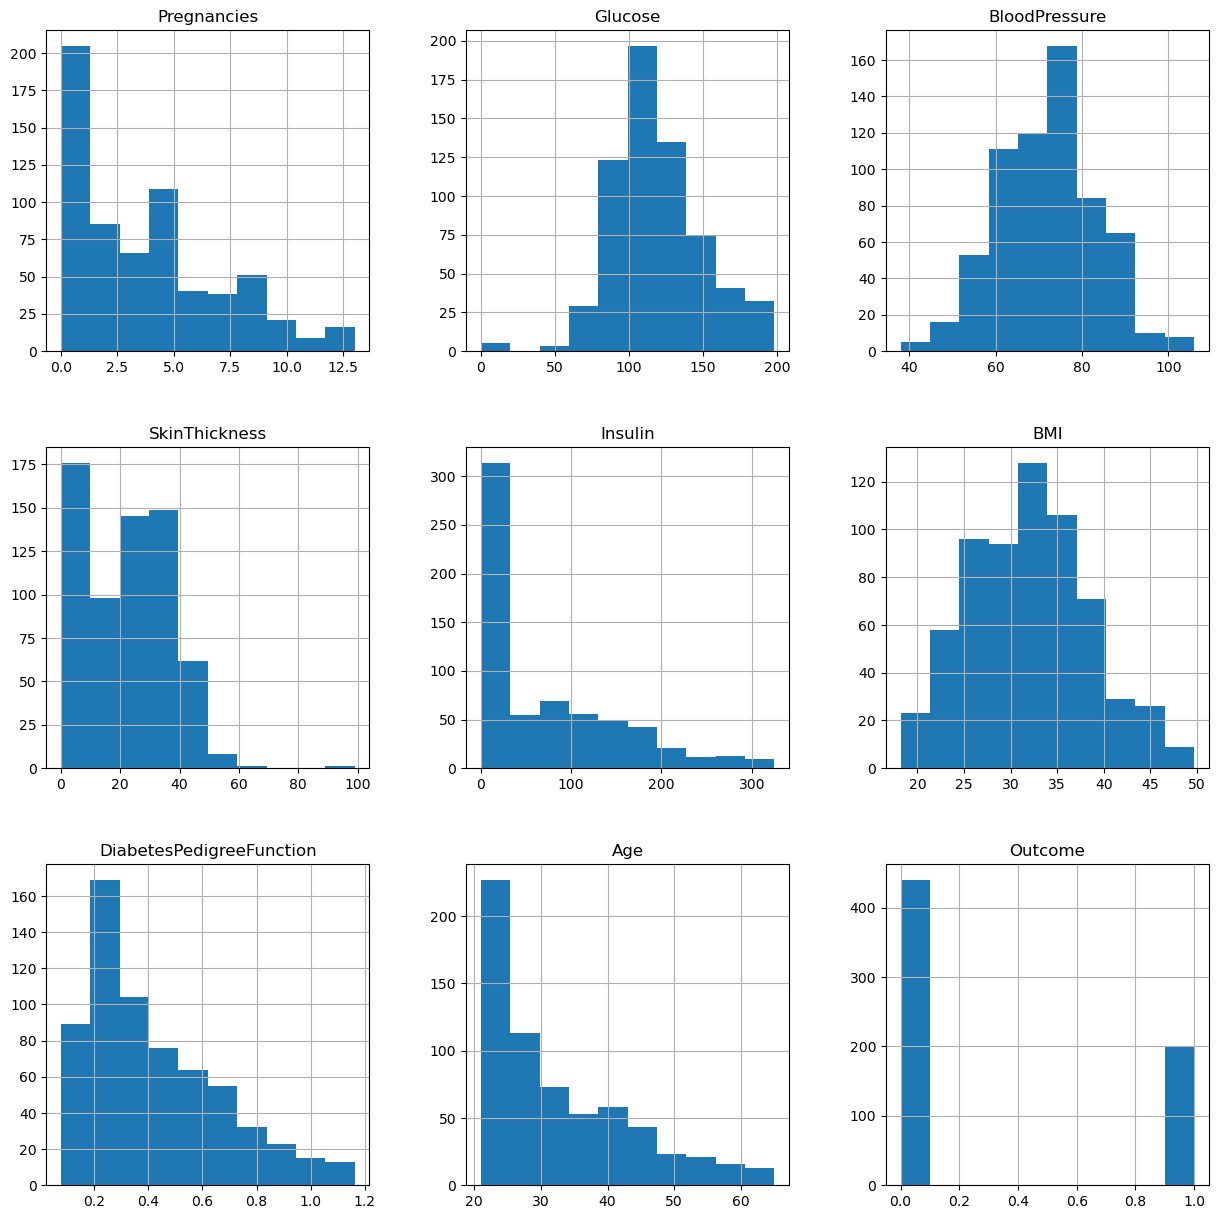

In [65]:
df.hist(figsize = (15,15),bins=10,)

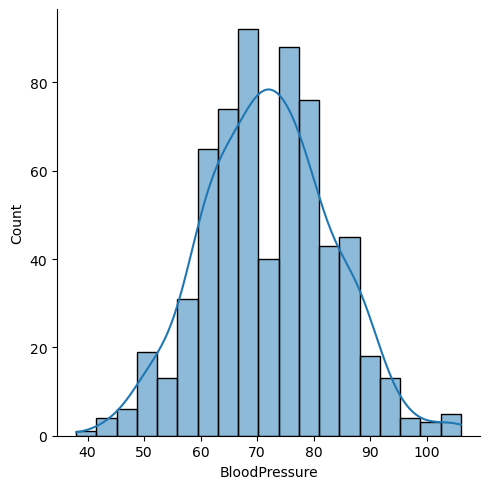

In [67]:
sns.displot(df.BloodPressure, kde=True)

# BloodPressure column is normaly distributed

#Hence the Imperical rule is applicable here which says that the whole data lies within the 3 standard deviation of the mean of BoodPressure column 

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

In [119]:
scaler = StandardScaler()
model = LogisticRegression()

In [80]:
X = df.drop('Outcome', axis = 1)

In [81]:
y = df['Outcome']

In [82]:
xtrain, xtest, ytrain , ytest = train_test_split(X, y, test_size=0.25, random_state=23)

In [121]:
xtrain

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
541,3,128,72,25,190,32.4,0.549,27
175,8,179,72,42,130,32.7,0.719,36
440,0,189,104,25,0,34.3,0.435,41
107,4,144,58,28,140,29.5,0.287,37
410,6,102,90,39,0,35.7,0.674,28
...,...,...,...,...,...,...,...,...
289,5,108,72,43,75,36.1,0.263,33
40,3,180,64,25,70,34.0,0.271,26
585,1,93,56,11,0,22.5,0.417,22
52,5,88,66,21,23,24.4,0.342,30


In [85]:
steps = [('Standard_scaler', scaler),
         ('Logistic_model', model)
        ]

In [86]:
pipe = Pipeline(steps)

In [87]:
pipe

Pipeline(steps=[('Standard_scaler', StandardScaler()),
                ('Logistic_model', LogisticRegression())])

In [88]:
pipe.fit(xtrain, ytrain)

Pipeline(steps=[('Standard_scaler', StandardScaler()),
                ('Logistic_model', LogisticRegression())])

In [89]:
preds = pipe.predict(xtest)

In [90]:
preds

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1], dtype=int64)

In [92]:
accuracy_score(ytest, preds)

0.76875

In [101]:
xtest.iloc[14]

Pregnancies                   9.000
Glucose                     154.000
BloodPressure                78.000
SkinThickness                30.000
Insulin                     100.000
BMI                          30.900
DiabetesPedigreeFunction      0.164
Age                          45.000
Name: 669, dtype: float64

In [107]:
preds[14]

1

In [103]:
input = []
for i in range(len(xtest.columns)):
    val = xtest.iloc[4][i]
    input.append(val)
    

In [106]:
pipe.predict([input])

array([1], dtype=int64)